In [1]:
import matplotlib.pyplot as plt
import pyaerocom as pya

Initating pyaerocom configuration
Checking server configuration ...
Checking access to: /lustre/storeA
Access to lustre database: True
Init data paths for lustre
Expired time: 0.010 s


In [2]:
from pyaerocom.io.readungridded import ReadUngridded

In [3]:
from pyaerocom.io.read_aasetal import ReadSulphurAasEtAl

In [4]:
pya.browse_database("*GAW*")


Dataset name: GAWTADsubsetAasEtAl
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data
Supported variables: ['sconcSO4precip', 'pr', 'wetso4', 'sconcso2', 'sconcso4']
Last revision: n/a


In [5]:
#pya.browse_database("*EMEP*")

In [6]:
#pya.browse_database('EMEP_rv4.1.1.T2.1_ctl')

In [7]:
#reader = ReadUngridded('GAWTADsubsetAasEtAl')

In [8]:
#reader.read(vars_to_retrieve="sconcso2")

In [9]:
DATA_ID = 'GAWTADsubsetAasEtAl'
VAR_TO_READ = 'sconcso2'
reader = ReadUngridded(DATA_ID)

# THESE SHOULD BE IDENTICAL:
    - if a station only include one variable we should make .plot_timeseries with out the need for a variable, check if it does so
   
   

In [38]:
a = ["a", "b"]
np.subtract(a, a)

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U1') dtype('<U1') dtype('<U1')

In [10]:
reader.read(vars_to_retrieve="sconcso2")

Found Cache match for GAWTADsubsetAasEtAl


UngriddedData <networks: ['GAWTADsubsetAasEtAl']; vars: ['sconcso2', 'sconcso4', 'sconcSO4precip', 'pr', 'wetso4']; instruments: ['3_stage_filterpack', 'passive_sampler', 'abs_solution', 'monitor', 'filter_1pack', '2_stage_filterpack', 'filter_denuder_sampler', 'filter-1pack', 'filter_3pack', 'filter_2pack', 'pm10_sampler', 'filter-3pack', 'wet only', 'bulk', 'bulk ', 'wet-only'];No. of stations: 629

In [11]:
DATA_ID = 'GAWTADsubsetAasEtAl'
VAR_TO_READ = 'sconcso2'
reader = ReadSulphurAasEtAl(DATA_ID)
reader.read(vars_to_retrieve="sconcso2")

['sconcso2']
adding var sconcso2 (assigned index: 0)


UngriddedData <networks: ['GAWTADsubsetAasEtAl']; vars: ['sconcso2']; instruments: ['3_stage_filterpack', 'passive_sampler', 'abs_solution', 'monitor', 'filter_1pack', '2_stage_filterpack', 'filter_denuder_sampler'];No. of stations: 152

In [12]:
reader

In [13]:
data = reader.read(vars_to_retrieve = None)

['sconcso2']
adding var sconcso2 (assigned index: 0)
['sconcso4']
adding var sconcso4 (assigned index: 1)
['wetso4', 'pr', 'sconcSO4precip']
adding var wetso4 (assigned index: 2)
adding var pr (assigned index: 3)
adding var sconcSO4precip (assigned index: 4)


In [14]:
data

UngriddedData <networks: ['GAWTADsubsetAasEtAl']; vars: ['sconcso2', 'sconcso4', 'wetso4', 'pr', 'sconcSO4precip']; instruments: ['3_stage_filterpack', 'passive_sampler', 'abs_solution', 'monitor', 'filter_1pack', '2_stage_filterpack', 'filter_denuder_sampler', 'filter-1pack', 'filter_3pack', 'filter_2pack', 'pm10_sampler', 'filter-3pack', 'wet only', 'bulk', 'bulk ', 'wet-only'];No. of stations: 629

In [15]:
data._data.shape

(1008552, 12)

In [16]:
data._DATAINDEX

6

In [17]:
import numpy as np

In [18]:
np.bincount(data._data[:, data._VARINDEX].astype("int64")) # burde stoppet på 4

array([ 42562,  38387, 309201, 309201, 309201])

In [19]:
import numpy as np

In [20]:
np.unique(data._data[:, data._VARINDEX])  # this should be five

array([0., 1., 2., 3., 4.])

In [21]:
data2 = reader.read(vars_to_retrieve = "sconcso4")

['sconcso4']
adding var sconcso4 (assigned index: 0)


# How come this is different than using pya.io.ReadUngridded("GAW")

## How to find common stations with another data set 

After reading one variable, shoudn't the dataset data only contain one variable. This works in the python script.

In [22]:
data.contains_vars

['sconcso2', 'sconcso4', 'wetso4', 'pr', 'sconcSO4precip']

In [23]:
data2.contains_vars

['sconcso4']

## Plotting all available stations for the two variables "sconsso2" and "sconsso4"

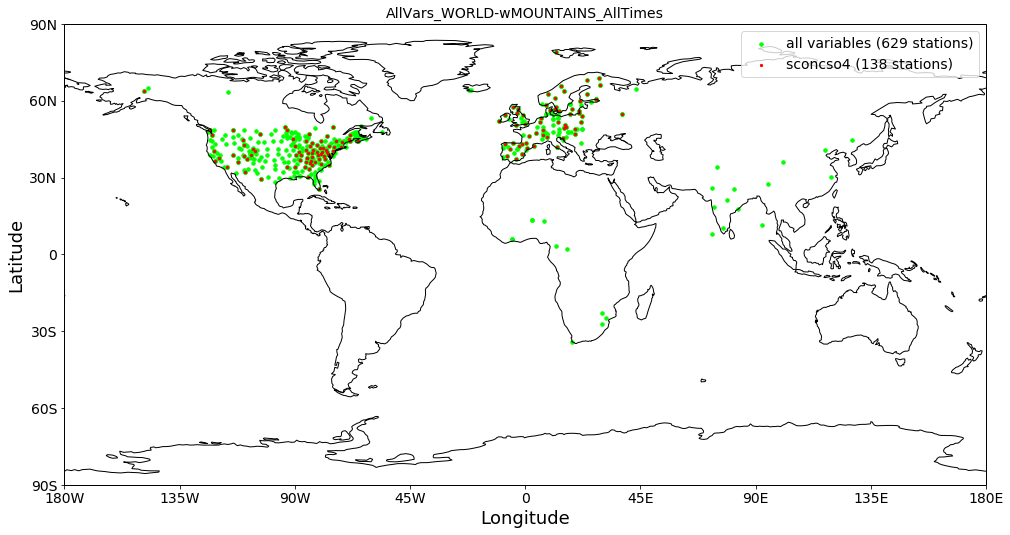

In [24]:
ax = data.plot_station_coordinates(markersize=12, color='lime', label = "all variables")
data2.plot_station_coordinates(markersize=5, color='red', ax = ax,  label = "sconcso4")

In [25]:
merged = data.merge_common_meta(ignore_keys = ["station_name", 'instrument_name', 'ts_type', 'filename'])

In [26]:
len(merged.unique_station_names), len(data.unique_station_names)

(440, 440)

### Displaying the ten first stationnames. 

In [27]:
data.station_name[:10]

['Abington',
 'Acadia NP',
 'Algoma',
 'Alhambra',
 'Amersfoort',
 'Anholt',
 'Ann Arbor',
 'Arendtsville',
 'Ashland',
 'Aspvreten']

In [28]:
algoma = data.to_station_data('Algoma', 'sconcso2')
abington = data.to_station_data('Abington', 'sconcso2')
alhambra = data.to_station_data('Alhambra', 'sconcso2')

2.0 ['sconcso2'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
154.0 ['sconcso2'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
295.0 ['sconcso2'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
0.0 ['sconcso2'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
152.0 ['sconcso2'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
3.0 ['sconcso2'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
155.0 ['sconcso2'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000


In [29]:
algoma.get_meta()

{'latitude': 47.03,
 'longitude': -84.38,
 'altitude': nan,
 'filename': '/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data/monthly_so2.csv',
 'station_name': 'Algoma',
 'instrument_name': '3_stage_filterpack',
 'ts_type': 'monthly',
 'data_id': 'GAWTADsubsetAasEtAl',
 'ts_type_src': 'monthly'}

# Why does this need a imput variable when algoma only contain one?

Text(0.5,1,'Plotting Several Stations In One Figure')

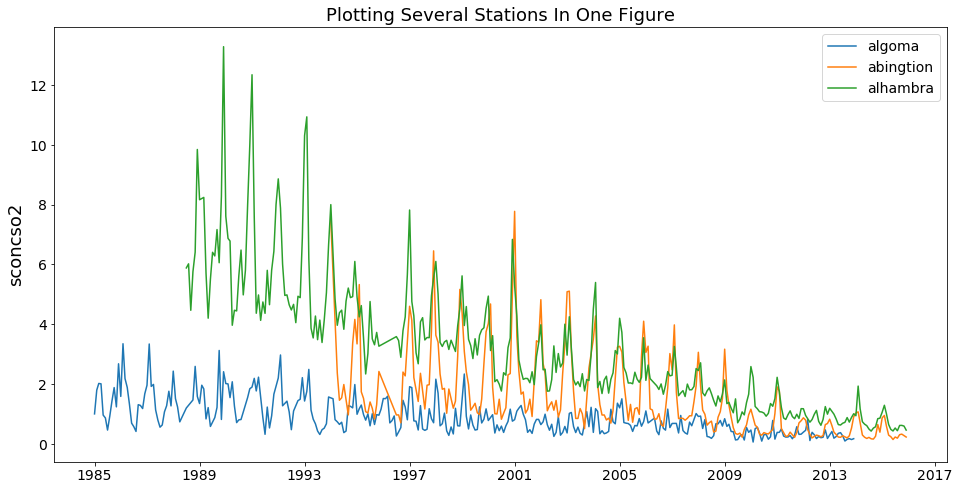

In [30]:
ax = algoma.plot_timeseries('sconcso2', label = "algoma")
abington.plot_timeseries('sconcso2', ax = ax, label = "abingtion") 
alhambra.plot_timeseries('sconcso2', ax = ax, label = "alhambra") 
ax.set_title("Plotting Several Stations In One Figure")

In [31]:
algoma.station_coords

{'latitude': 47.03, 'longitude': -84.38, 'altitude': nan}

In [32]:
help(data.get_variable_data)

Help on method get_variable_data in module pyaerocom.ungriddeddata:

get_variable_data(variables, start=None, stop=None, ts_type=None, **kwargs) method of pyaerocom.ungriddeddata.UngriddedData instance
    Extract all data points of a certain variable
    
    Parameters
    ----------
    vars_to_extract : :obj:`str` or :obj:`list`
        all variables that are supposed to be accessed



In [33]:
hmm = data.get_variable_data("sconcso4")

0.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
152.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
290.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
1.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
153.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
291.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
292.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
293.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
294.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
2.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
154.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
295.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
3.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
155.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00

361.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
39.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
185.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
40.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
186.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
362.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
363.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
41.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
187.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
364.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
365.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
366.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
42.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
188.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-0

445.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
446.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
447.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
448.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
449.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
78.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
450.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
79.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
222.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
451.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
80.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
223.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
452.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
453.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-

528.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
529.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
530.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
531.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
110.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
253.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
532.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
533.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
534.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
535.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
536.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
111.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
537.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
538.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-

618.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
619.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
620.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
145.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
284.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
621.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
146.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
285.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
622.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
147.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
286.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
623.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
624.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-01-01T00:00:00.000000
148.0 ['sconcso4'] 1970-01-01T00:00:00.000000 2200-

AttributeError: 'str' object has no attribute 'dtime'

In [ ]:
hmm = data.get_variable_data("sconcso2")

# Find the number of common stations that have both variables

In [ ]:
len(data.find_common_stations(data2))

# Plotting a regional map over stations

In [ ]:
data.plot_station_coordinates(markersize=12, color='lime')

In [ ]:
help(data.plot_station_coordinates)

In [ ]:
data.contains_vars

# Cool function to implement plot_station_coordinates based on stationnames and of they are all in one region it filters outs by itselves.

### How do I remove this print???

In [ ]:
ax = data.plot_station_coordinates(var_name="sconcso2", 
                                   filter_name="EUROPE-noMOUNTAINS",
                                   color='r', marker='o', markersize=8)

# How to retrieve the units from the variable??

In [ ]:
algoma

In [ ]:
reader = ReadSulphurAasEtAl(DATA_ID)
ungridded = reader.read()

In [ ]:
ungridded

In [ ]:
ungridded.unique_station_names[:10]

Is it possible to locate based on coordinates

In [ ]:
import numpy as np

#### This is a bit pequliar 

In [ ]:
len(np.unique(ungridded.latitude)), len(ungridded.unique_station_names)

In [ ]:
help(ungridded.merge_common_meta)

In [ ]:
equal = ungridded.merge_common_meta(ignore_keys = "instruments")

In [ ]:
equal

In [ ]:
algoma.get_meta()

In [ ]:
algoma2 = ungridded["Abington (CT15)"]

In [ ]:
# That one variable can not be stored in the same place.